# Population dynamics

## For the fish
* At each chronon, a fish moves randomly to one of the adjacent unoccupied squares. If there are no free squares, no movement takes place.
* Once a fish has survived a certain number of chronons it may reproduce. This is done as it moves to a neighbouring square, leaving behind a new fish in its old position. Its reproduction time is also reset to zero.

## For the sharks
* At each chronon, a shark moves randomly to an adjacent square occupied by a fish. If there is none, the shark moves to a random adjacent unoccupied square. If there are no free squares, no movement takes place.
* At each chronon, each shark is deprived of a unit of energy.
* Upon reaching zero energy, a shark dies.
* If a shark moves to a square occupied by a fish, it eats the fish and earns a certain amount of energy.
* Once a shark has survived a certain number of chronons it may reproduce in exactly the same way as the fish.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import seaborn as sns

In [49]:
rdgn = sns.diverging_palette(h_neg=50, h_pos=550, s=99, l=55, sep=3, as_cmap=True)

In [84]:
class population:

    def __init__(self, size, fish, sharks):
        self.size = size
        self.fish = fish
        self.sharks = sharks
        self.grid = np.zeros((size, size))

    def empty_slots(self):
        return np.where(self.grid == 0)
    
    def setup(self):

        # where are the empty slots on the grid
        empty_for_fish = self.empty_slots()

        #which indeces should the fish occupy
        fish_starters = rd.sample(range(0, len(empty_for_fish[0])), self.fish)

        print(len(empty_for_fish[0]))
        print(fish_starters)

        #for each sampled empty slot
        for position in fish_starters:

            #occupy it with a fish
            self.grid[empty_for_fish[0][position], empty_for_fish[1][position]] = 1

        #where do the shark fit
        empty_for_shark = self.empty_slots()

        #which indeces should the shark occupy
        shark_starters = rd.sample(range(0, len(empty_for_shark[0])), self.sharks)
        print(len(empty_for_shark[0]))

        #for each sampled empty slot
        for position in shark_starters:

            #occupy it with a shark, the more negative, the better for the shark
            #The shark digit is separated
            # tens: shows the eating value, 
            # ones: shows the reproduction value
            self.grid[empty_for_shark[0][position], empty_for_shark[1][position]] = -10

    def view(self):
        
        #get a heatmap for the grid
        sns.heatmap(self.grid, cmap=rdgn,center=0.00)
        plt.title("Blue: Fish \n Red: Sharks")    
        plt.show()  
        
    def update(self):


        # updating the fish
        #where are my fish?
        fish_list = np.where(self.grid > 0)

        #for each fisch
        for fish in range(len(fish_list[0])):

            reproduction_value = self.grid[fish_list[0][fish], fish_list[1][fish]]
            
            free_spots = []
            #get a direction
            for direction in [((fish_list[0][fish] +1)%self.size, fish_list[1][fish]),  #up
            ((fish_list[0][fish] -1)%self.size, fish_list[1][fish]), #down 
            (fish_list[0][fish], (fish_list[1][fish] - 1)%self.size), #left
            (fish_list[0][fish], (fish_list[1][fish] + 1)%self.size)]: #right

                #is that spot free on our grid?
                if self.grid[direction[0], direction[1]] == 0:
                    free_spots.append(direction)

            print(free_spots)

            #if there are no free spots
            if free_spots == []:

                self.grid[fish_list[0][fish], fish_list[1][fish]] += 1

            else:

                #choose a direction
                chosen_dir = rd.choice(free_spots)
                print(chosen_dir)

                #check if we reproduce
                if reproduction_value < 3:
                    #move fish there
                    self.grid[chosen_dir[0], chosen_dir[1]] = reproduction_value + 1

                    #delete fish from old spot
                    self.grid[fish_list[0][fish], fish_list[1][fish]] = 0

                else:
                    #move fish there and reset reproduction value
                    self.grid[chosen_dir[0], chosen_dir[1]] = 1

                    #introduce the reproduced fish child
                    self.grid[fish_list[0][fish], fish_list[1][fish]] = 1

        print(self.grid)


        #update the sharks

        #find my sharks 
        shark_list = np.where(self.grid < 0)

        #for each shark
        for shark in range(len(shark_list[0])):

            #get the shark value we are working with
            shark_value = self.grid[shark_list[0][shark], shark_list[1][shark]]
            
            #make lists with potential places to move to
            fish_spots = []
            free_spots = []
            
            #get a direction
            for direction in [((shark_list[0][shark] +1)%self.size, shark_list[1][shark]),  #up
            ((shark_list[0][shark] -1)%self.size, shark_list[1][shark]), #down 
            (shark_list[0][shark], (shark_list[1][shark] - 1)%self.size), #left
            (shark_list[0][shark], (shark_list[1][shark] + 1)%self.size)]: #right

                #is that spot free on our grid?
                if self.grid[direction[0], direction[1]] == 0:
                    fish_spots.append(direction)

                if self.grid[direction[0], direction[1]] > 0:
                    free_spots.append(direction)

            print(fish_spots)

            if len(fish_spots) != 0:
                
                #choose a direction
                chosen_dir = rd.choice(fish_spots)
                print(chosen_dir)

                #check if we reproduce (after five timesteps)
                if shark_value%-10 < 5:
                    
                    #move shark there
                    self.grid[chosen_dir[0], chosen_dir[1]] = shark_value - 11 #we subtract 10 for eating a fish and 1 to the reproduction clock

                    #delete shark from old spot
                    self.grid[shark_list[0][shark], shark_list[1][shark]] = 0

                else:
                    #move shark
                    #we reset the clock by getting rid of the ones and subract 10 for eating afish
                    self.grid[chosen_dir[0], chosen_dir[1]] = shark_value + (shark_value%10) -10 

                    #introduce the reproduced shark child
                    self.grid[shark_list[0][shark], shark_list[1][shark]] = -10

            elif len(free_spots) != 0:
                new_shark_val = shark_value + (shark_value%10) + 10

                #check if shark died and we move on to the next shark
                if new_shark_val//-10 == 0:
                    self.grid[chosen_dir[0], chosen_dir[1]] = 0
                    continue 


                #choose free spot
                #choose a direction
                chosen_dir = rd.choice(free_spots)
                print(chosen_dir)

                

                #check if we reproduce (after five timesteps)
                if shark_value%-10 < 5:
                    
                    #move shark there
                    self.grid[chosen_dir[0], chosen_dir[1]] = shark_value + 9 #we add 10 for not eating a fish and subract 1 to increase the reproduction clock

                    #delete shark from old spot
                    self.grid[shark_list[0][shark], shark_list[1][shark]] = 0

                else:
                    #move shark
                    #we reset the clock by getting rid of the ones 
                    
                    self.grid[chosen_dir[0], chosen_dir[1]] = new_shark_val #we move the shark and punish it for not eating 

                    #a new shark is born
                    self.grid[shark_list[0][shark], shark_list[1][shark]] = -10 

            else:
                self.grid[shark_list[0][shark], shark_list[1][shark]] = shark_value + 9


            

               


9
[5]
8
[[  0.   0. -10.]
 [  0.   0.   1.]
 [  0.   0.   0.]]


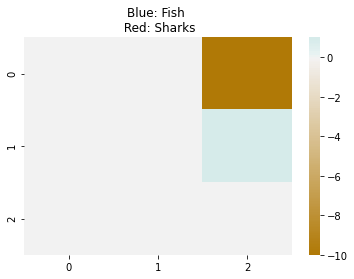

[(2, 2), (1, 1), (1, 0)]
(2, 2)
[[  0.   0. -10.]
 [  0.   0.   0.]
 [  0.   0.   2.]]
[(1, 2), (0, 1), (0, 0)]
(1, 2)


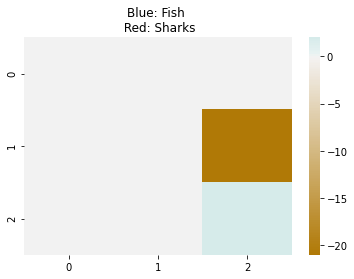

In [85]:
sim = population(3, 1, 1)
sim.setup()
print(sim.grid)
sim.view()
sim.update()
sim.view()

In [72]:
sim.grid

array([[-10., -10.,   3.],
       [-10., -28.,   0.],
       [-22., -22.,   3.]])

In [81]:
-12%-10

-2